This notebook is part of [**Byron v0.8**](https://pypi.org/project/byron/)  
Copyright 2023-24 Giovanni Squillero and Alberto Tonda  
SPDX-License-Identifier: [Apache-2.0](https://opensource.org/license/apache-2-0/) 

In [1]:
# Did you `!pip install -U byron`?
import byron

/var/folders/31/dkl97hks2c14b663vl55pt440000gn/T/ipykernel_6025/670150310.py:2: ByronPerformanceWarning: 
  Paranoia checks are enabled in this notebook: performances can be significantly impaired
  [see https://cad-polito-it.github.io/byron/paranoia for details]
  import byron


In [2]:
byron.welcome()

This is Byron v0.8a1 "Don Juan" (dev62 @ 24-08-2024)
Copyright (c) 2023-24 Giovanni Squillero and Alberto Tonda

# Frames

Everything for the definition of the constraints (the old "instruction library") is under the namespace `byron.framework` (lazy fingers can use `byron.f`)

In [3]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2 ** 16))
macro_bar = byron.f.macro('bar {num:+0.3e}', num=byron.f.float_parameter(-1, 1))
macro_baz = byron.f.macro('baz 0x{array}', array=byron.f.array_parameter("0123456789abcdef", 8))

## Macro bunches

Macro bunches are sequences of macros randomly selected from a bunch.

In [4]:
bunch = byron.f.bunch([macro_foo, macro_bar, macro_baz], size=(5, 10 + 1))
byron.f.as_text(bunch)

; 🖋 n1 ➜ Frame❬MacroBunch#1❭
foo #2c83  ; 🖋 n1.n2 ➜ Macro❬User#1❭
foo #d806  ; 🖋 n1.n3 ➜ Macro❬User#1❭
baz 0x1026706d  ; 🖋 n1.n4 ➜ Macro❬User#3❭
bar -5.591e-01  ; 🖋 n1.n5 ➜ Macro❬User#2❭
foo #8e6f  ; 🖋 n1.n6 ➜ Macro❬User#1❭
foo #0353  ; 🖋 n1.n7 ➜ Macro❬User#1❭
foo #51be  ; 🖋 n1.n8 ➜ Macro❬User#1❭
baz 0xda846a32  ; 🖋 n1.n9 ➜ Macro❬User#3❭
foo #c285  ; 🖋 n1.n10 ➜ Macro❬User#1❭
baz 0x3bb81e3c  ; 🖋 n1.n11 ➜ Macro❬User#3❭



The relative frequencies of the macros may be tweaked

In [5]:
bunch = byron.f.bunch([macro_foo, macro_bar, macro_baz], size=20, weights=[10, 2, 1])
byron.f.as_text(bunch)

; 🖋 n12 ➜ Frame❬MacroArray#1❭
foo #0d96  ; 🖋 n12.n13 ➜ Macro❬User#1❭
bar +1.225e-01  ; 🖋 n12.n14 ➜ Macro❬User#2❭
foo #d6cb  ; 🖋 n12.n15 ➜ Macro❬User#1❭
foo #70dd  ; 🖋 n12.n16 ➜ Macro❬User#1❭
foo #e5fe  ; 🖋 n12.n17 ➜ Macro❬User#1❭
foo #8e6f  ; 🖋 n12.n18 ➜ Macro❬User#1❭
bar +6.189e-01  ; 🖋 n12.n19 ➜ Macro❬User#2❭
foo #0353  ; 🖋 n12.n20 ➜ Macro❬User#1❭
bar +5.176e-01  ; 🖋 n12.n21 ➜ Macro❬User#2❭
bar -6.807e-01  ; 🖋 n12.n22 ➜ Macro❬User#2❭
foo #d860  ; 🖋 n12.n23 ➜ Macro❬User#1❭
foo #ae35  ; 🖋 n12.n24 ➜ Macro❬User#1❭
foo #8e45  ; 🖋 n12.n25 ➜ Macro❬User#1❭
foo #4f9b  ; 🖋 n12.n26 ➜ Macro❬User#1❭
foo #6e3d  ; 🖋 n12.n27 ➜ Macro❬User#1❭
foo #ac56  ; 🖋 n12.n28 ➜ Macro❬User#1❭
foo #3454  ; 🖋 n12.n29 ➜ Macro❬User#1❭
foo #2f7c  ; 🖋 n12.n30 ➜ Macro❬User#1❭
foo #c285  ; 🖋 n12.n31 ➜ Macro❬User#1❭
foo #3184  ; 🖋 n12.n32 ➜ Macro❬User#1❭



## Frames

### Sequences

Create all frames in the sequence

In [6]:
all_foo = byron.f.bunch([macro_foo], size=3)
all_bar = byron.f.bunch([macro_bar], size=3)
seq = byron.f.sequence(['begin', all_foo, 'break', all_bar, 'end'])
byron.f.as_text(seq)

; 🖋 n33 ➜ Frame❬FrameSequence#1❭
begin  ; 🖋 n33.n34 ➜ Macro❬Text#1❭
; 🖋 n33.n35 ➜ Frame❬MacroArray#2❭
foo #d806  ; 🖋 n33.n35.n36 ➜ Macro❬User#1❭
foo #1045  ; 🖋 n33.n35.n37 ➜ Macro❬User#1❭
foo #0f41  ; 🖋 n33.n35.n38 ➜ Macro❬User#1❭
break  ; 🖋 n33.n39 ➜ Macro❬Text#2❭
; 🖋 n33.n40 ➜ Frame❬MacroArray#3❭
bar -8.126e-01  ; 🖋 n33.n40.n41 ➜ Macro❬User#2❭
bar -5.347e-01  ; 🖋 n33.n40.n42 ➜ Macro❬User#2❭
bar +2.040e-01  ; 🖋 n33.n40.n43 ➜ Macro❬User#2❭
end  ; 🖋 n33.n44 ➜ Macro❬Text#3❭



Given the top frame, it is possible to visualize the forest with the syntactic structure (*as_forest*). **Note**: The text is the result of a [depth-first search](https://en.wikipedia.org/wiki/Depth-first_search) of the syntactic structure. 

It is also possible to visualize a frame as a, perhaps more intuitive, linear-genetic-programming genome (*as_lgp*) 

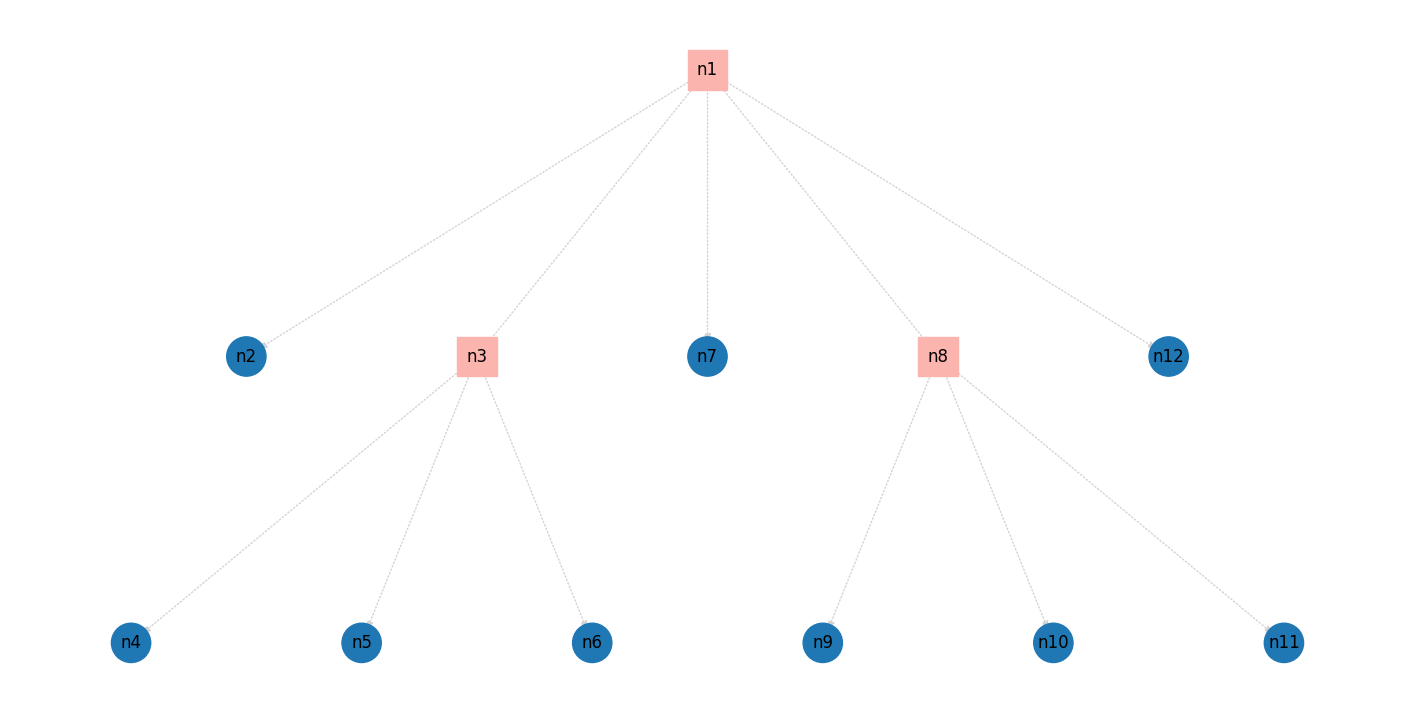

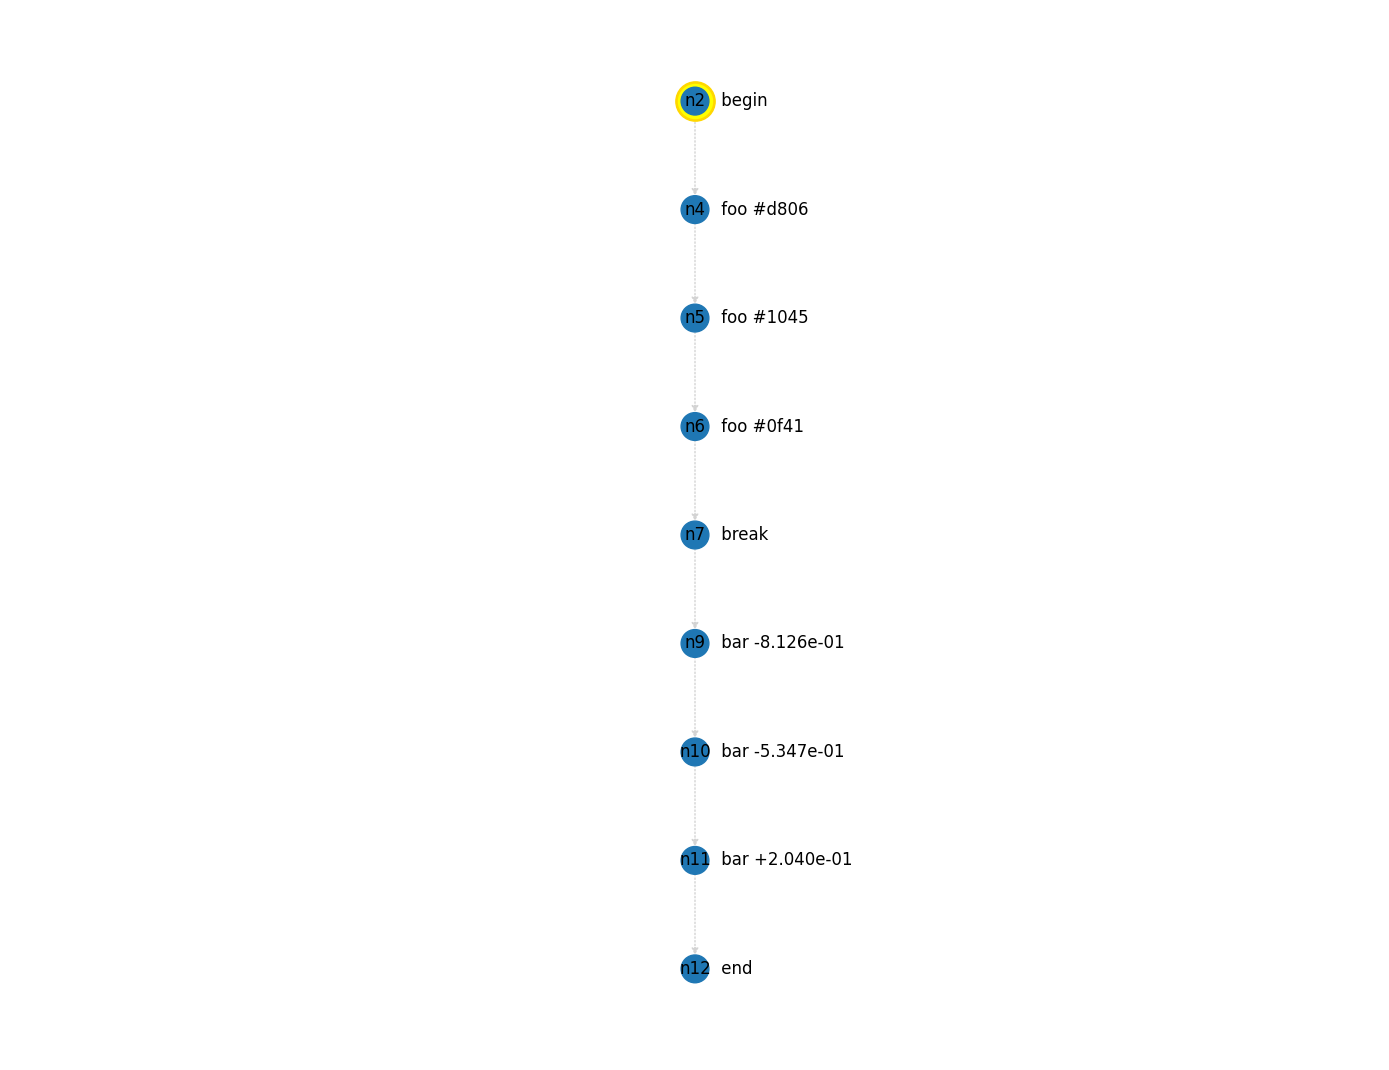

In [7]:
byron.f.as_forest(seq)
byron.f.as_lgp(seq)

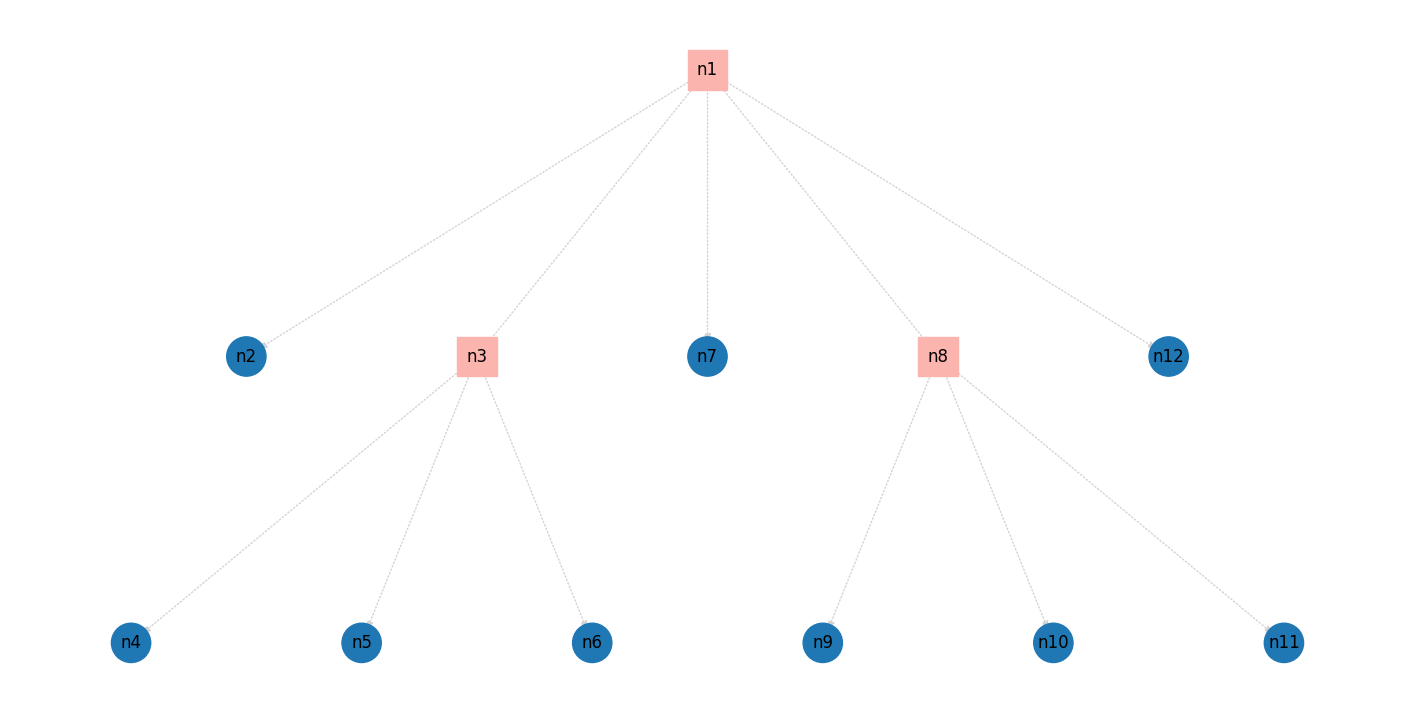

In [8]:
byron.f.as_forest(seq)

### Alternatives

Randomly chose a frame from the different alternatives

In [9]:
alt = byron.f.alternative([macro_foo, macro_bar, all_foo, all_bar, 'dummy'])

for n in range(5):
    byron.f.as_text(alt, seed=n)

; 🖋 n117 ➜ Frame❬FrameAlternative#1❭
; 🖋 n117.n118 ➜ Frame❬MacroArray#3❭
bar -1.901e-01  ; 🖋 n117.n118.n119 ➜ Macro❬User#2❭
bar +5.676e-01  ; 🖋 n117.n118.n120 ➜ Macro❬User#2❭
bar -3.934e-01  ; 🖋 n117.n118.n121 ➜ Macro❬User#2❭

; 🖋 n122 ➜ Frame❬FrameAlternative#1❭
bar +1.384e-01  ; 🖋 n122.n123 ➜ Macro❬User#2❭

; 🖋 n124 ➜ Frame❬FrameAlternative#1❭
foo #2ee4  ; 🖋 n124.n125 ➜ Macro❬User#1❭

; 🖋 n126 ➜ Frame❬FrameAlternative#1❭
bar +1.853e-01  ; 🖋 n126.n127 ➜ Macro❬User#2❭

; 🖋 n128 ➜ Frame❬FrameAlternative#1❭
bar -3.934e-01  ; 🖋 n128.n129 ➜ Macro❬User#2❭



### Frame Bunches

Like macro bunches, but made of frames

In [10]:
mix = byron.f.bunch([all_foo, all_bar], size=3)
byron.f.as_text(mix)

; 🖋 n130 ➜ Frame❬FrameArray#1❭
; 🖋 n130.n131 ➜ Frame❬MacroArray#2❭
foo #d6cb  ; 🖋 n130.n131.n132 ➜ Macro❬User#1❭
foo #70dd  ; 🖋 n130.n131.n133 ➜ Macro❬User#1❭
foo #e5fe  ; 🖋 n130.n131.n134 ➜ Macro❬User#1❭
; 🖋 n130.n135 ➜ Frame❬MacroArray#3❭
bar +1.785e-01  ; 🖋 n130.n135.n136 ➜ Macro❬User#2❭
bar +6.189e-01  ; 🖋 n130.n135.n137 ➜ Macro❬User#2❭
bar -9.870e-01  ; 🖋 n130.n135.n138 ➜ Macro❬User#2❭
; 🖋 n130.n139 ➜ Frame❬MacroArray#2❭
foo #51be  ; 🖋 n130.n139.n140 ➜ Macro❬User#1❭
foo #d860  ; 🖋 n130.n139.n141 ➜ Macro❬User#1❭
foo #ae35  ; 🖋 n130.n139.n142 ➜ Macro❬User#1❭



### Nesting Sequences and Alternatives

In [11]:
all_foo = byron.f.bunch([macro_foo], size=3)
all_bar = byron.f.bunch([macro_bar], size=3)
sequence1 = byron.f.sequence(['; seq1 ----------------------', all_foo, all_bar])
sequence2 = byron.f.sequence(['; seq2 ----------------------', all_bar, all_foo])
alternative = byron.f.alternative([sequence1, sequence2])
final_sequence = byron.f.sequence(
    ['; sseq1 =====================', alternative, '; sseq2 =====================', alternative, alternative]
)

; 🖋 n143 ➜ Frame❬FrameSequence#4❭
; sseq1 =====================  ; 🖋 n143.n144 ➜ Macro❬Text#7❭
; 🖋 n143.n145 ➜ Frame❬FrameAlternative#2❭
; 🖋 n143.n145.n146 ➜ Frame❬FrameSequence#2❭
; seq1 ----------------------  ; 🖋 n143.n145.n146.n147 ➜ Macro❬Text#5❭
; 🖋 n143.n145.n146.n148 ➜ Frame❬MacroArray#4❭
foo #ac56  ; 🖋 n143.n145.n146.n148.n149 ➜ Macro❬User#1❭
foo #3454  ; 🖋 n143.n145.n146.n148.n150 ➜ Macro❬User#1❭
foo #2f7c  ; 🖋 n143.n145.n146.n148.n151 ➜ Macro❬User#1❭
; 🖋 n143.n145.n146.n152 ➜ Frame❬MacroArray#5❭
bar -2.401e-01  ; 🖋 n143.n145.n146.n152.n153 ➜ Macro❬User#2❭
bar -2.820e-01  ; 🖋 n143.n145.n146.n152.n154 ➜ Macro❬User#2❭
bar -3.121e-01  ; 🖋 n143.n145.n146.n152.n155 ➜ Macro❬User#2❭
; sseq2 =====================  ; 🖋 n143.n156 ➜ Macro❬Text#8❭
; 🖋 n143.n157 ➜ Frame❬FrameAlternative#2❭
; 🖋 n143.n157.n158 ➜ Frame❬FrameSequence#2❭
; seq1 ----------------------  ; 🖋 n143.n157.n158.n159 ➜ Macro❬Text#5❭
; 🖋 n143.n157.n158.n160 ➜ Frame❬MacroArray#4❭
foo #876f  ; 🖋 n143.n157.n158.n160.n161 ➜

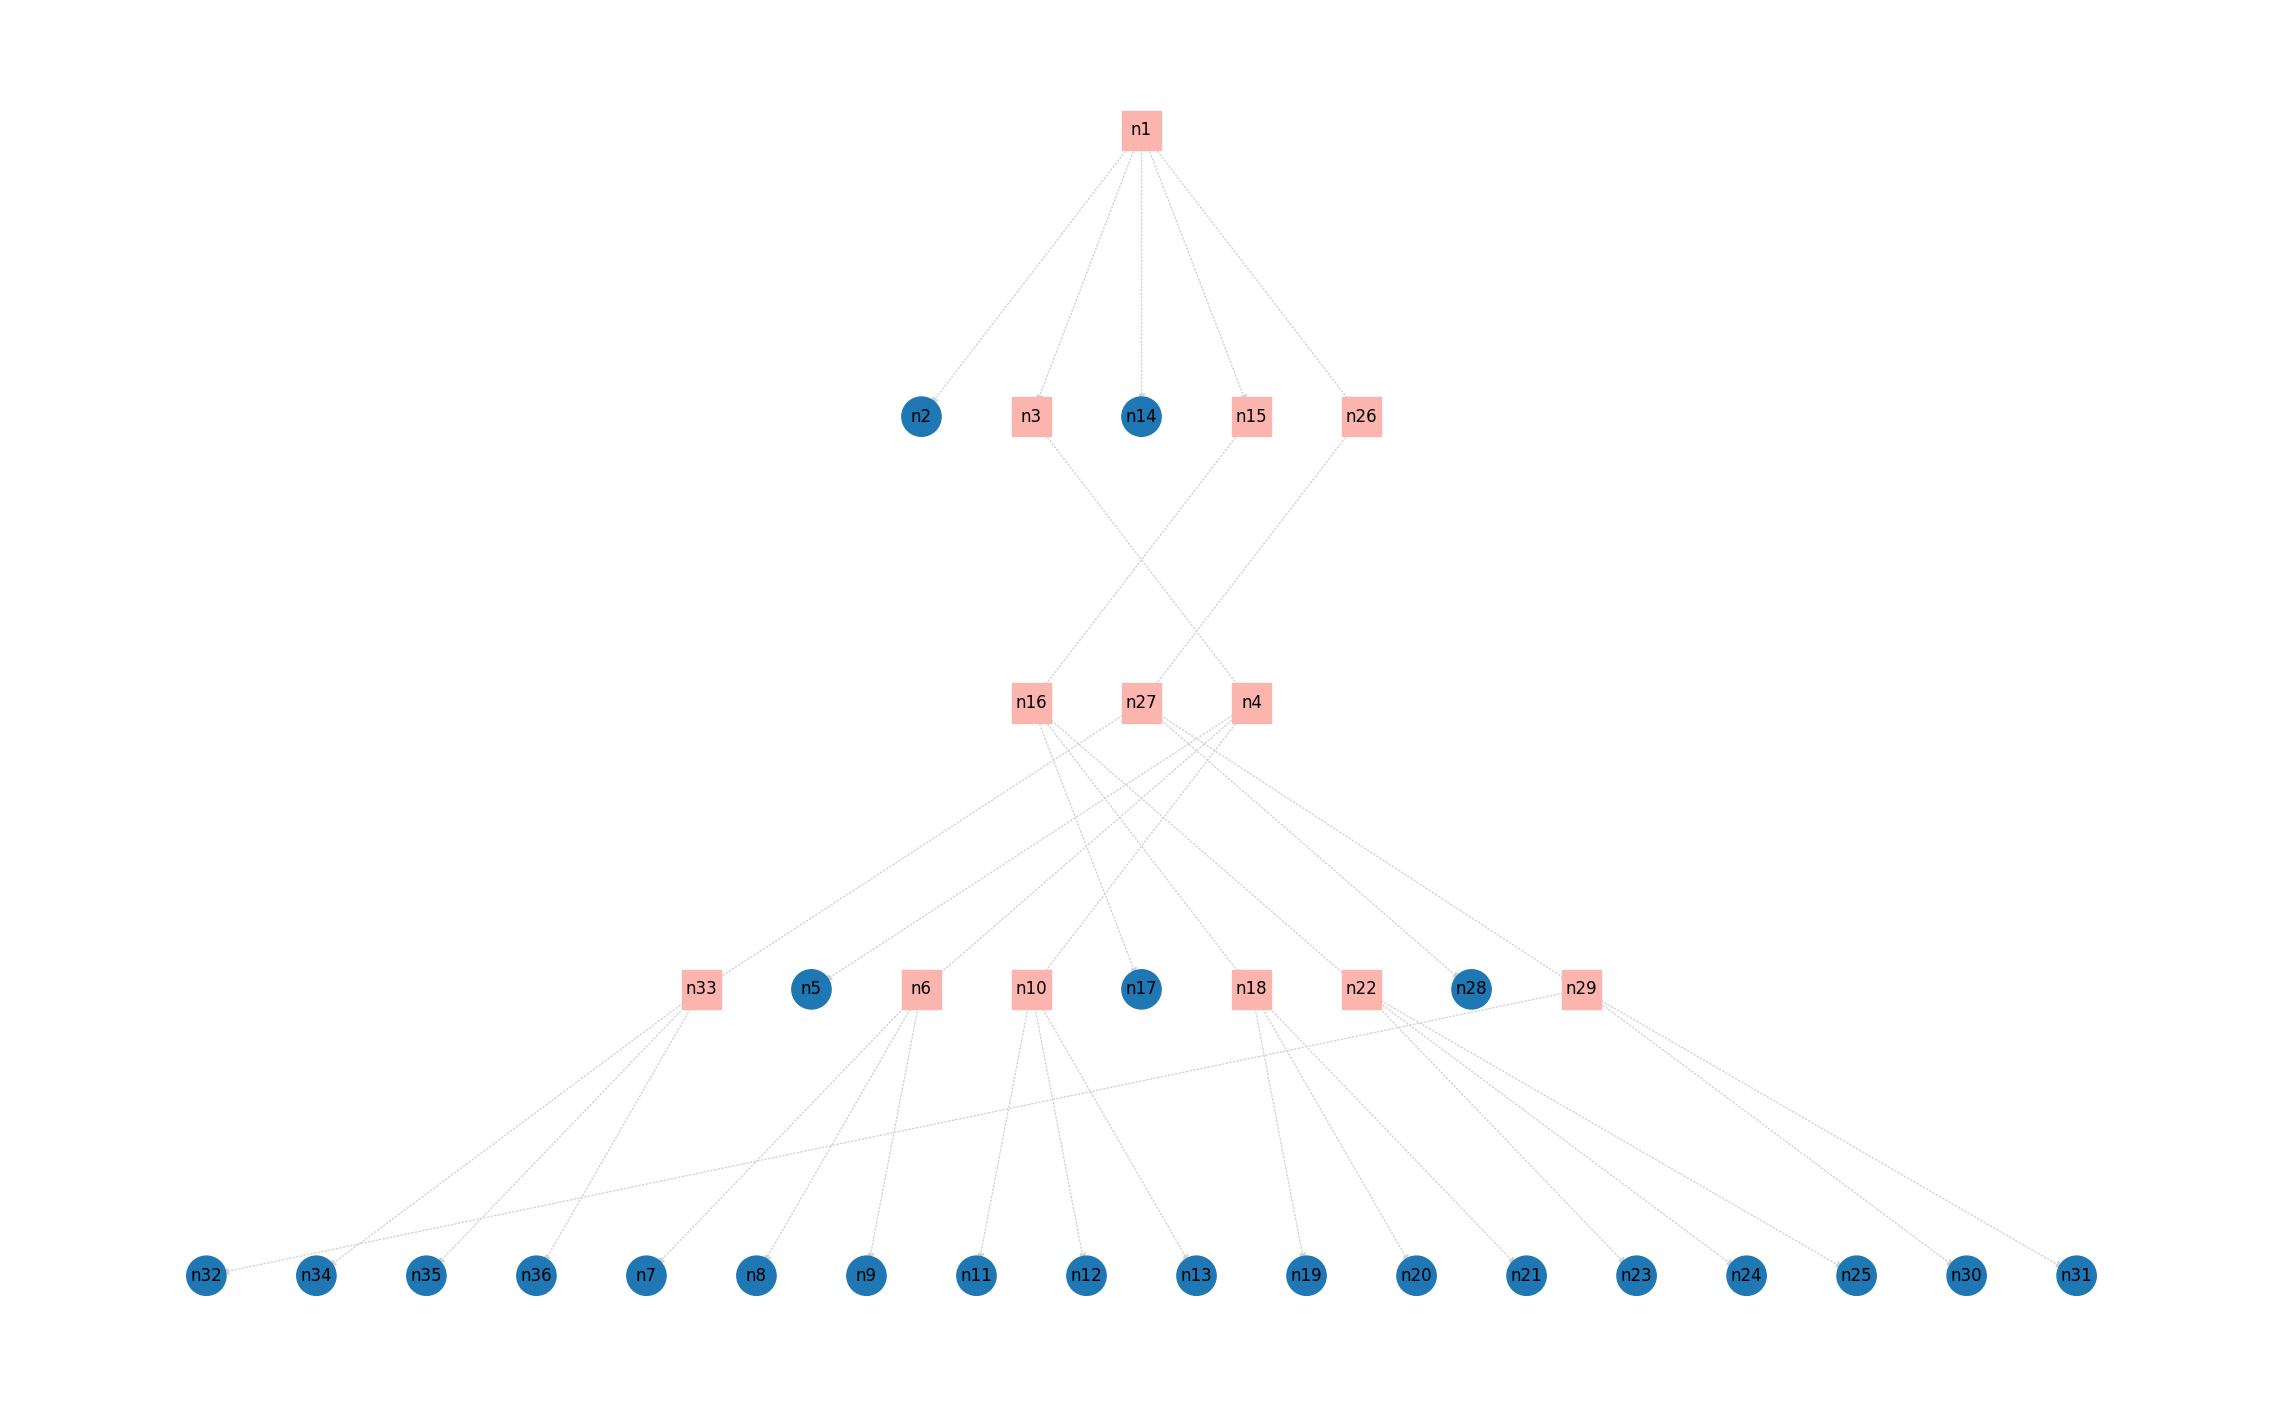

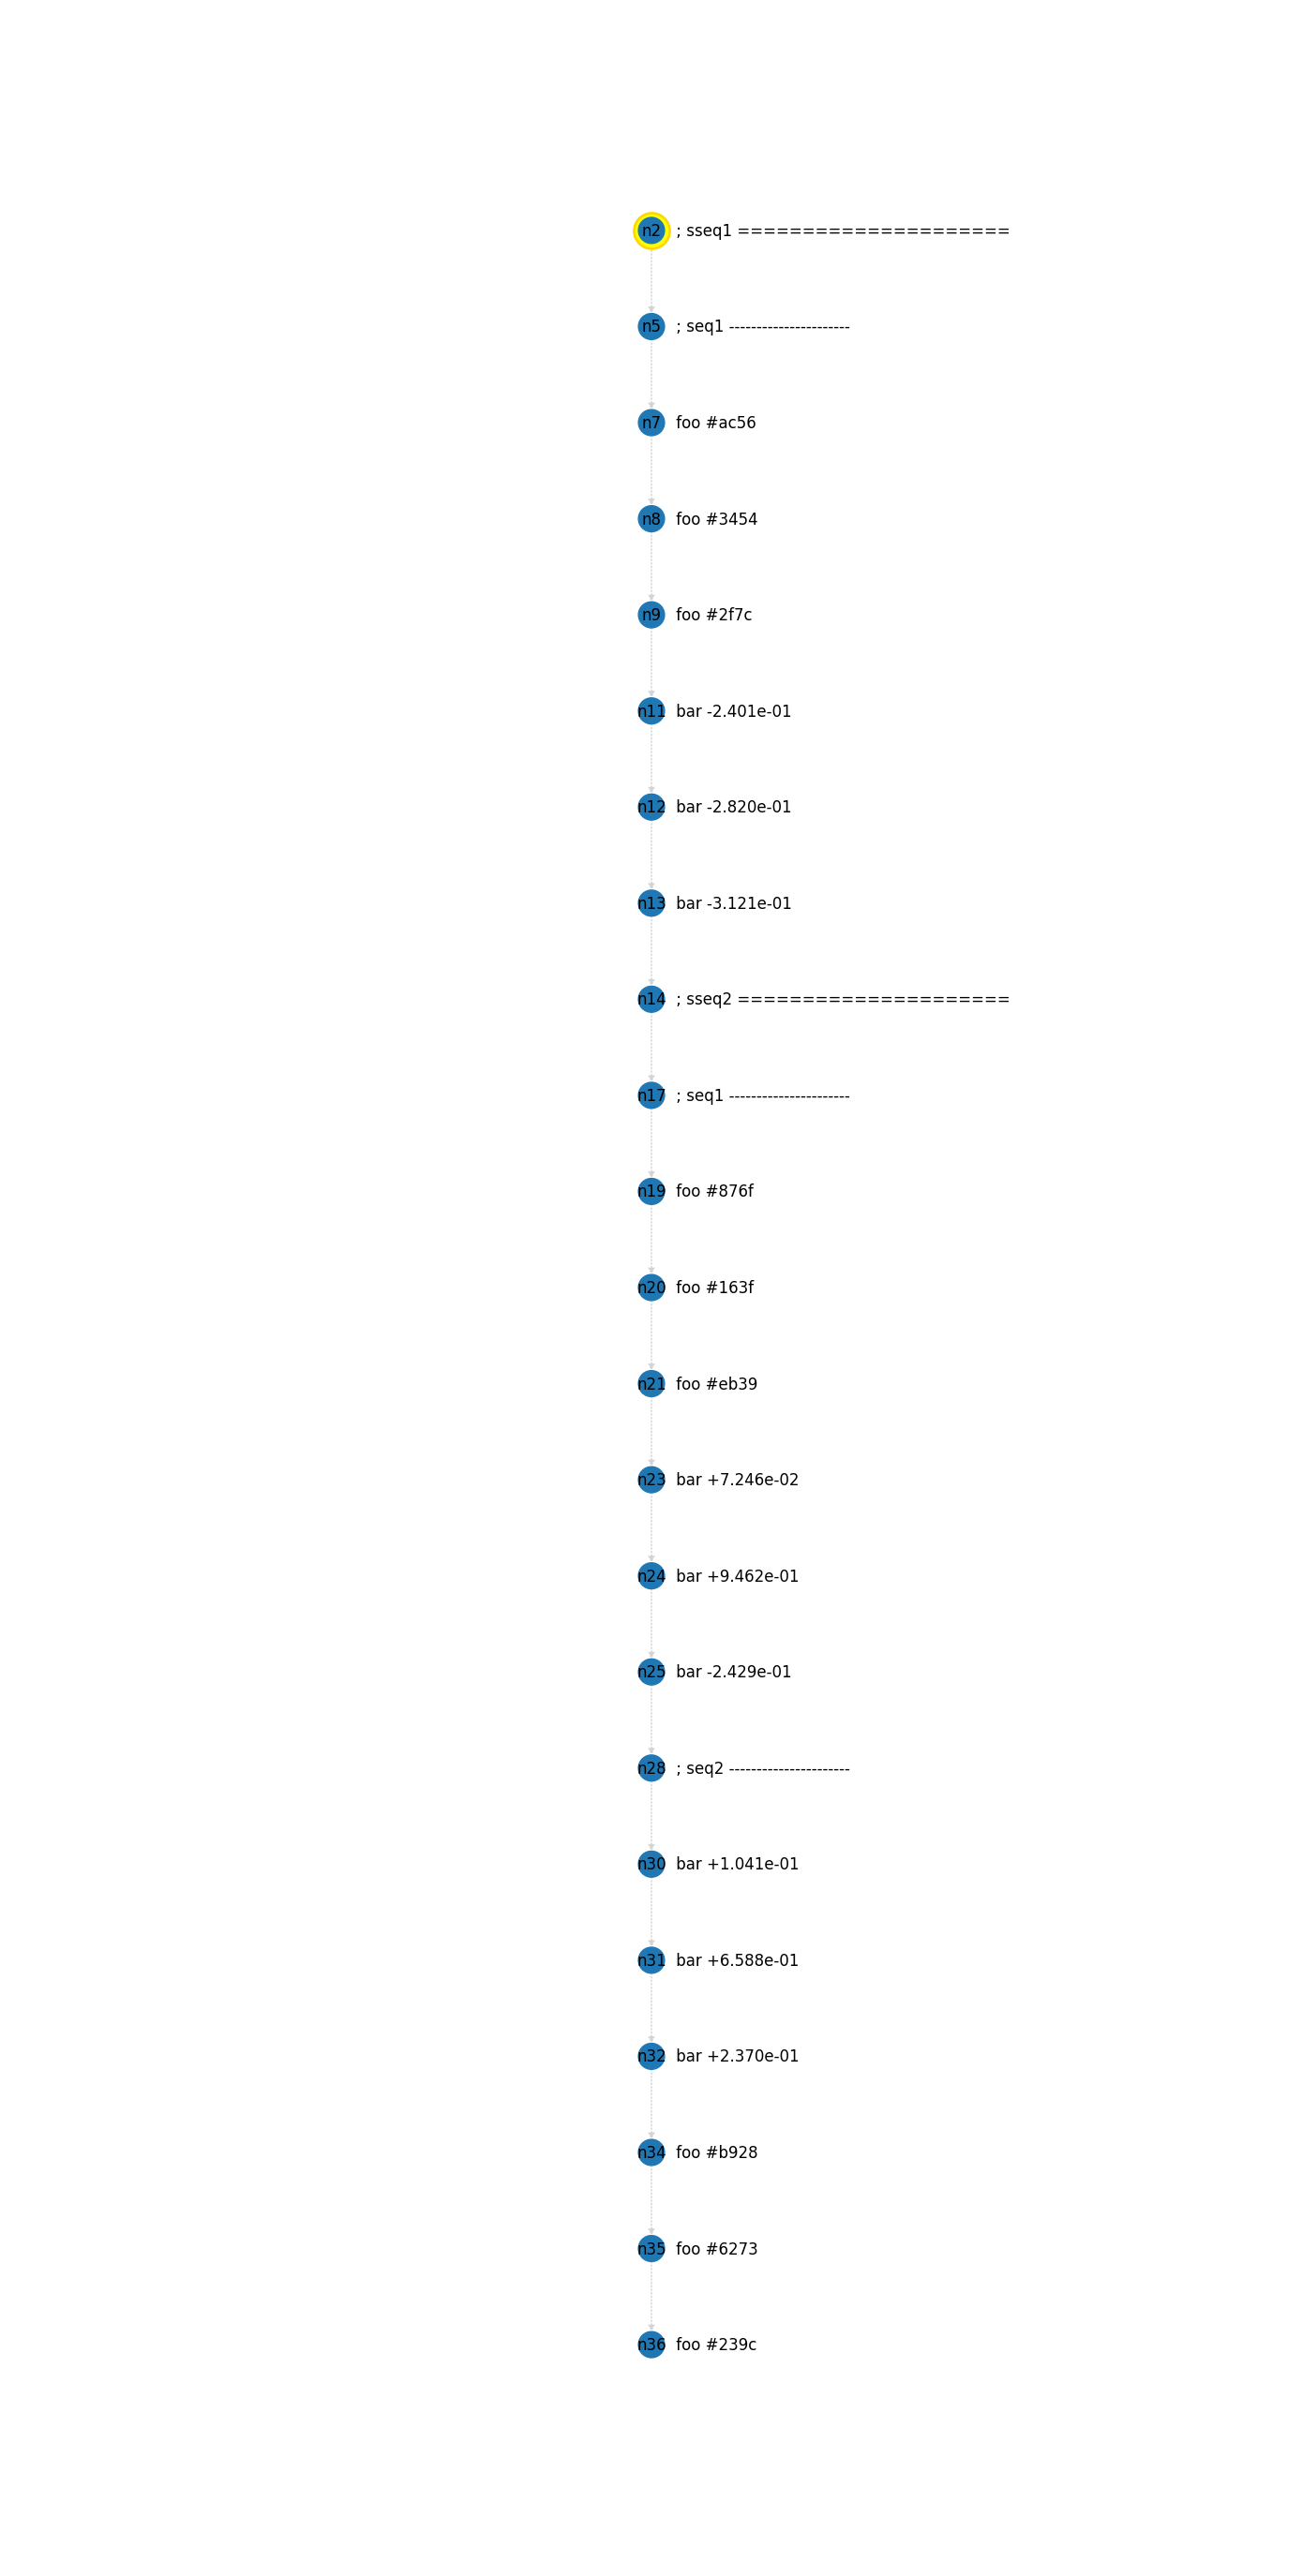

In [12]:
byron.f.as_text(final_sequence)
byron.f.as_forest(final_sequence)
byron.f.as_lgp(final_sequence)

## Frame Names and String Magic

It is possible to specify a (unique) user name for Frames. The name can then be used to specify the frame.

In [13]:
all_foo = byron.f.bunch([macro_foo], size=3, name='Foo')
all_bar = byron.f.bunch([macro_bar], size=3, name='Bar')

In [14]:
all_foo == all_bar, all_foo == 'Foo', all_foo == 'Bar'

(False, True, False)

In [15]:
set([all_foo, 'Foo', 'Bar', all_bar])

{'Bar', Frame❰Foo❱}